In [1]:
# Lorenz Attractor
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import scipy
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


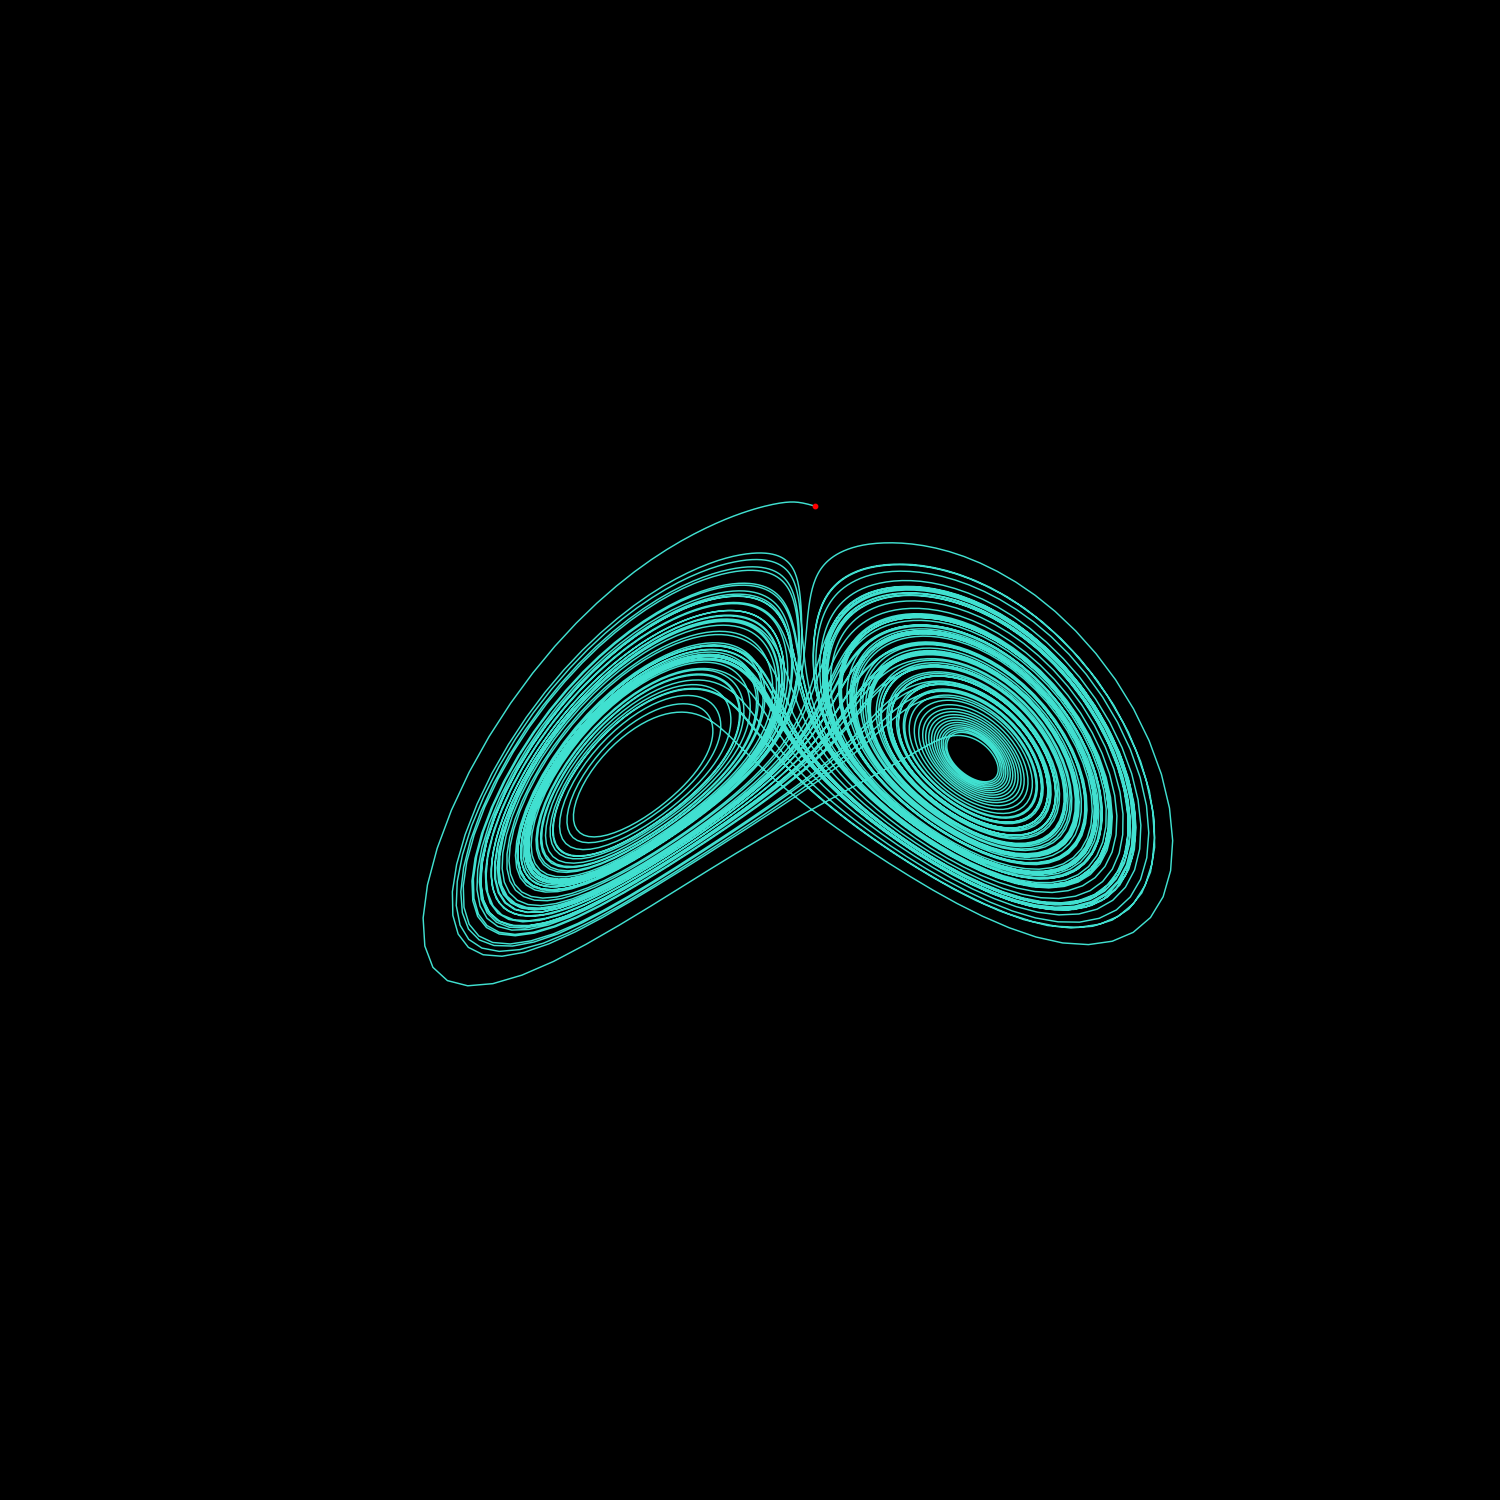

In [2]:
# Defining the Dynamics of the Lorenz attractor

# Defining the constants required
sigma = 10
rho = 28
beta = 2.667

# System Dynamics in a function routine
def lorenz_attractor_dynamics(t, xyz):
    x, y, z = xyz
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]


# Integrating the system dynamics to produce the curve

T = 100
t = np.arange(0,T,0.01)
steps = len(t)
states = np.zeros((len(t)*steps,3))             # [ (Number of time steps) x (3 coords) ]

# Plotting the curve
ax = plt.figure(facecolor = 'k', figsize=(15,15)).add_subplot(projection='3d')
ax.set_facecolor('k')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

single_init_cond = 1

if single_init_cond:
    xyz0 = -1
    xyz1 = 2
    xyz2 = 1.05                                 # Lorentz's own chosen initial condition!
    # state = scipy.integrate.odeint(lorenz_attractor_dynamics, xyz0, t)
    state = solve_ivp(lorenz_attractor_dynamics, (0, T), (xyz0, xyz1, xyz2), method='RK45', dense_output=True)
    x, y, z = state.sol(t)                        # t vector defined earlier
    ax.scatter( xyz0, xyz1, xyz2, c='r', s=10)
    ax.text(xyz0, xyz1, xyz2, '{},{},{}'.format(xyz0, xyz1, xyz2))
    ax.plot(x, y, z, 'turquoise', lw=1.05)
    ax.set_axis_off()
    plt.show()
else:
    coord = np.arange(-0.5,1.1,0.05)            # a range of initial conditions
    init_cond = np.asarray(np.meshgrid(coord, coord, coord))
    init_cond = np.reshape(init_cond, (init_cond.shape[1]*init_cond.shape[2]*init_cond.shape[3], 3))
    for i in range(len(init_cond)):
        # Integrating the system
        xyz0 = init_cond[i,:]
        state = scipy.integrate.odeint(lorenz_attractor_dynamics, xyz0, t)
        ax.scatter(xyz0[0], xyz0[1], xyz0[2], c='r', s=50)
        ax.text(xyz0[0], xyz0[1], xyz0[2], '{},{},{}'.format(xyz0[0], xyz0[1], xyz0[2]))
        ax.plot(state[:,0], state[:,1], state[:,2], 'b', lw=0.5)    
    plt.show()

<IPython.core.display.Javascript object>


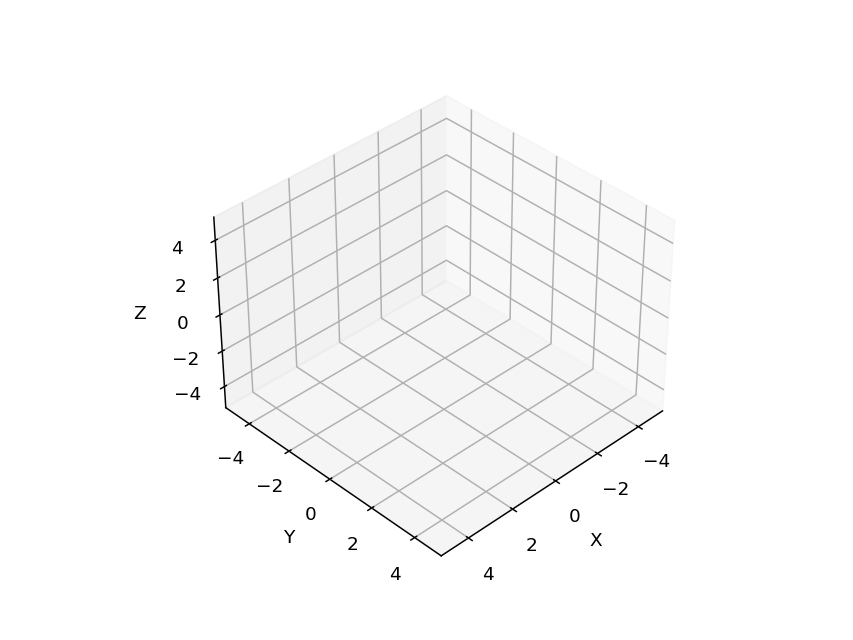

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
#np.random.seed(19680801)


#def random_walk(num_steps, max_step=0.05):
#    """Return a 3D random walk as (num_steps, 3) array."""
#    start_pos = np.random.random(3)
#    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
#    walk = start_pos + np.cumsum(steps, axis=0)
#    return walk


# def update_lines(num, walks, lines):
def update_lines(lines):
    #for line, walk in zip(lines, walks):
    #    # NOTE: there is no .set_data() for 3 dim data...
    #    line.set_data(walk[:num, :2].T)
    #    line.set_3d_properties(walk[:num, 2])
    
    line.set_data(state[i,:])
    line.set_3d_properties(state[i,:])
    
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
#num_steps = 30
#walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
#lines = [ax.plot([], [], [])[0] for _ in walks]
lines, = ax.plot(xyz0, xyz1, xyz2)

# Setting the axes properties
ax.set(xlim3d=(-5, 5), xlabel='X')
ax.set(ylim3d=(-5, 5), ylabel='Y')
ax.set(zlim3d=(-5, 5), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, interval=1000)

plt.show()

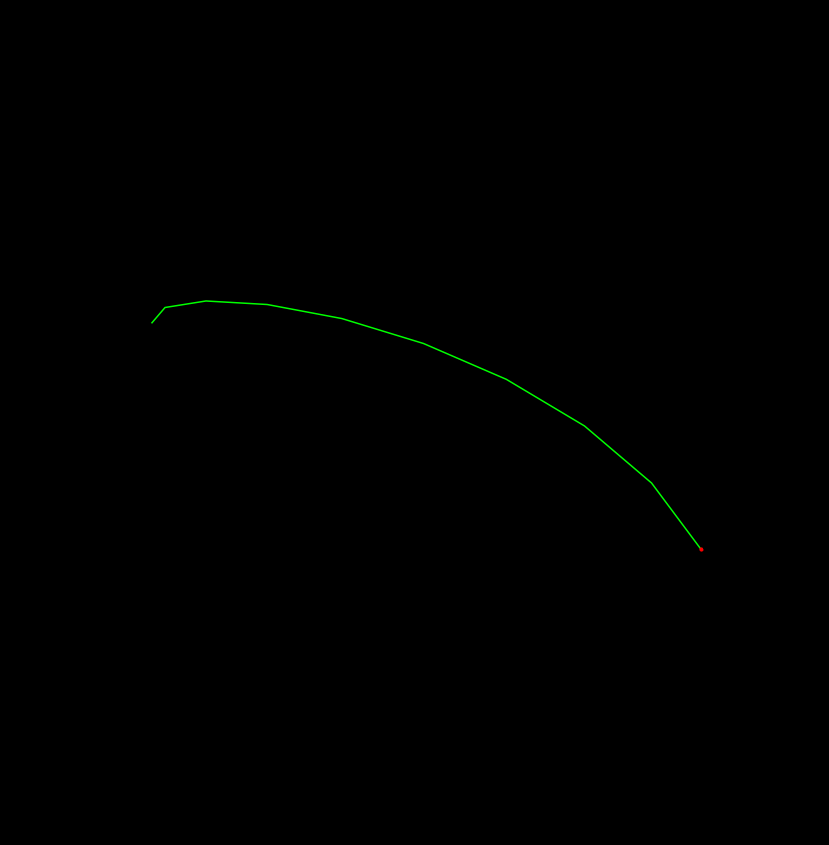

In [24]:
# AIZAWA ATTRACTOR
# ----------------

# Defining the Dynamics of the Aizawa Attractor

# Defining the constants required
# 
alpha = 0.95
beta = 0.7
gamma = 0.65
delta = 3.5
epsilon = 0.25
f = 0.1

# System Dynamics in a function routine
def aizawa_attractor_dynamics(t, state):
    x = state[0]
    y = state[1]
    z = state[2]
    dxdt = x*(z - beta) - delta*y
    dydt = delta*x + y*(z-beta)
    dzdt = gamma + alpha*z - ((z**3)/3) + (f*z*(x**3))
    return [dxdt, dydt, dzdt]


# Integrating the system dynamics to produce the curve

T = 1
t = np.arange(0,T,0.1)
steps = len(t)
states = np.zeros((len(t)*steps,3))             # [ (Number of time steps) x (3 coords) ]

# Plotting the curve
ax = plt.figure(facecolor = 'k', figsize=(15,15)).add_subplot(projection='3d')
ax.set_facecolor('k')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Aizawa Attractor")

single_init_cond = 1

if single_init_cond:
    xyz0 = 0.1                                # Randomly chosen initial condition!
    xyz1 = 0.1
    xyz2 = 0.3
    state = solve_ivp(aizawa_attractor_dynamics, (0, T), (xyz0, xyz1, xyz2), method='RK45', dense_output=True)
    x, y, z = state.sol(t)                      # t vector defined earlier
    ax.scatter( xyz0, xyz1, xyz2, c='r', s=10)
    ax.text(xyz0, xyz1, xyz2, '{},{},{}'.format(xyz0, xyz1, xyz2))
    ax.plot(x, y, z, 'lime', lw=1.5)
    ax.set_axis_off()
    plt.show()
else:
    coord = np.arange(-0.5,1.1,0.05)            # a range of initial conditions
    init_cond = np.asarray(np.meshgrid(coord, coord, coord))
    init_cond = np.reshape(init_cond, (init_cond.shape[1]*init_cond.shape[2]*init_cond.shape[3], 3))
    for i in range(len(init_cond)):
        # Integrating the system
        xyz0 = init_cond[i,:]
        state = scipy.integrate.odeint(aizawa_attractor_dynamics, xyz0, t)
        ax.scatter(xyz0[0], xyz0[1], xyz0[2], c='r', s=50)
        ax.text(xyz0[0], xyz0[1], xyz0[2], '{},{},{}'.format(xyz0[0], xyz0[1], xyz0[2]))
        ax.plot(state[:,0], state[:,1], state[:,2], 'b', lw=0.5)    
    plt.show()

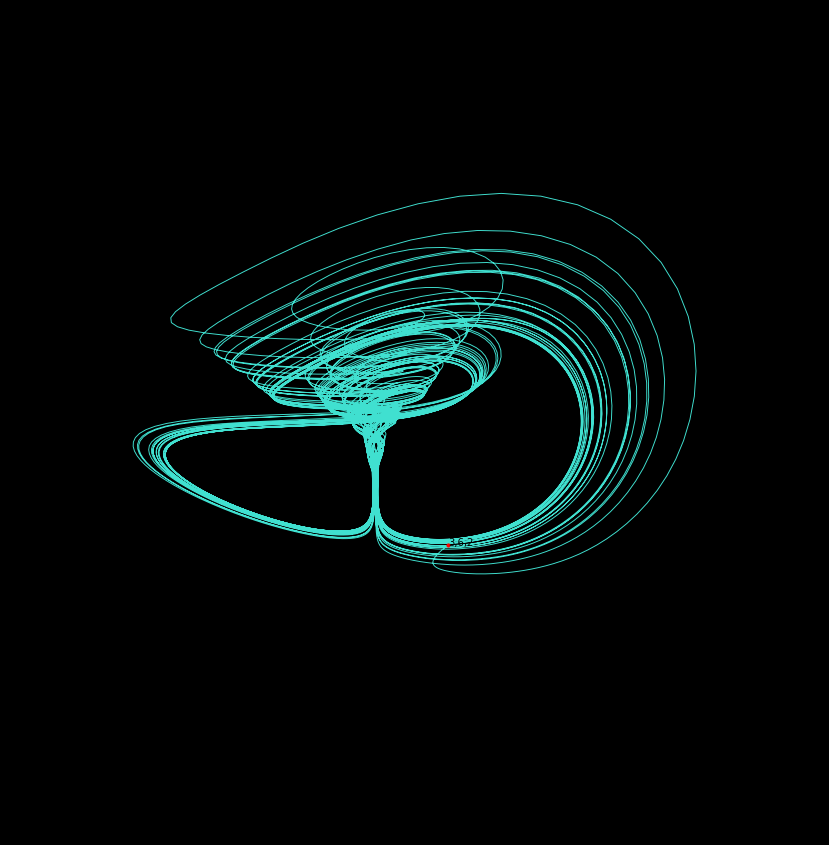